In [2]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv("E:\desktop\Prodigy Infotech Projects\Twitter_data.csv")
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first few rows and column names to ensure the data is loaded correctly
print(df.head())
print(df.columns)

Dataset loaded successfully!
   Tweet_no     location Tweet_Type  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Index(['Tweet_no', 'location', 'Tweet_Type', 'text'], dtype='object')


In [3]:
import re
import nltk
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#', '', text)        # Remove hashtags symbol
    text = re.sub(r'\d+', '', text)      # Remove digits
    text = re.sub(r'\W+', ' ', text)     # Remove non-word characters
    text = text.lower()                  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text


In [5]:
# Check if the 'text' column exists and preprocess it
if 'text' in df.columns:
    df['cleaned_text'] = df['text'].apply(preprocess_text)
    print("Text preprocessing completed successfully!")
else:
    raise ValueError("The dataset does not contain a 'text' column")

# Display the first few rows to ensure preprocessing is done
#print(df.head())

Text preprocessing completed successfully!


In [6]:
# Display the first few rows to ensure preprocessing is done
print(df.head())

   Tweet_no     location Tweet_Type  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   

                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                    cleaned_text  
0  im getting borderlands murder  
1            coming borders kill  
2    im getting borderlands kill  
3   im coming borderlands murder  
4  im getting borderlands murder  


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Define the function to get sentiment score
def get_sentiment(text):
    try:
        score = sia.polarity_scores(text)
        return score
    except Exception as e:
        print(f"Error in sentiment analysis: {e}")
        return {'compound': 0.0, 'pos': 0.0, 'neu': 0.0, 'neg': 0.0}

# Apply the function to the cleaned text
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Extract compound sentiment score
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

# Classify sentiment as positive, negative, or neutral
df['sentiment_class'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the first few rows to ensure sentiment analysis is done
print(df.head())


   Tweet_no     location Tweet_Type  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   

                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                    cleaned_text  \
0  im getting borderlands murder   
1            coming borders kill   
2    im getting borderlands kill   
3   im coming borderlands murder   
4  im getting borderlands murder   

                                           sentiment  compound sentiment_class  
0  {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...   -0.6908        negative  
1  {'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'comp

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

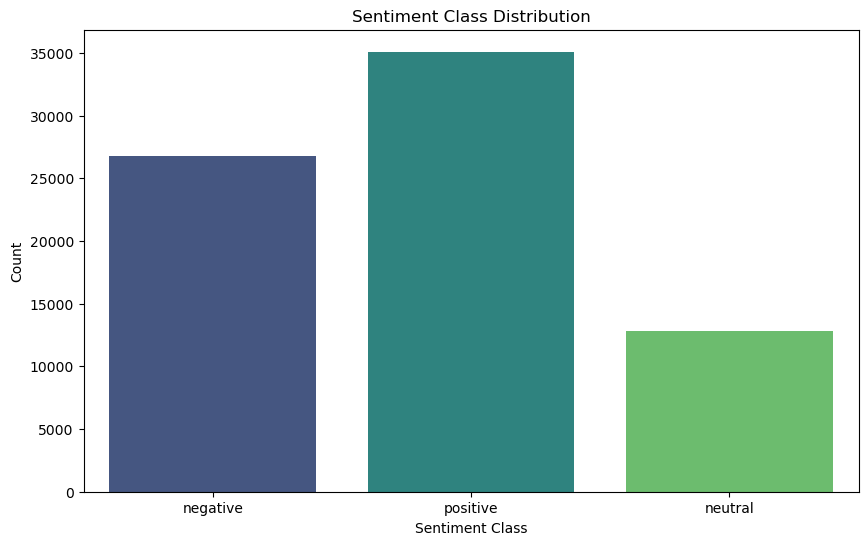

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_class', data=df, palette='viridis')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


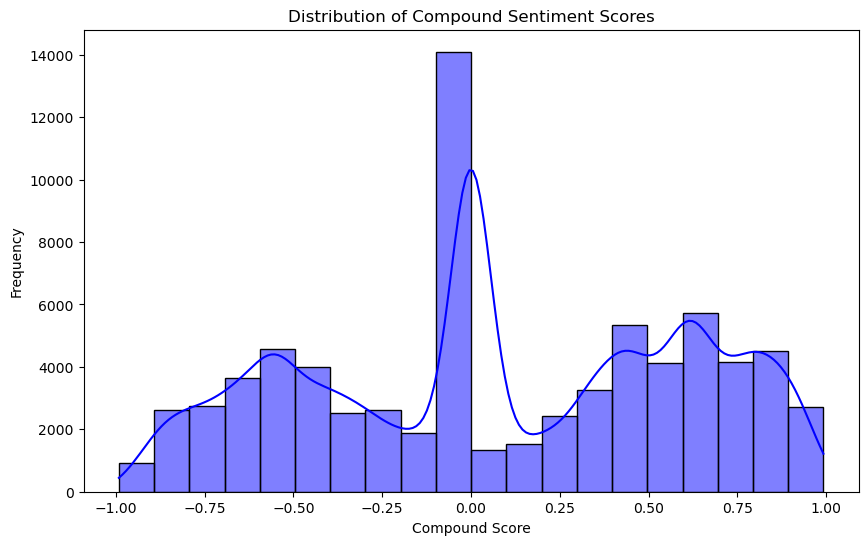

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['compound'],bins=20, kde=True, color='blue')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

In [13]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 219.4 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/300.2 kB 476.3 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 437.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 450.6 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 517.2 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 513.4 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 498.9 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 509.6 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/300.2 kB 491.5 kB/

In [14]:
from wordcloud import WordCloud

Word Cloud for Positive Sentiments


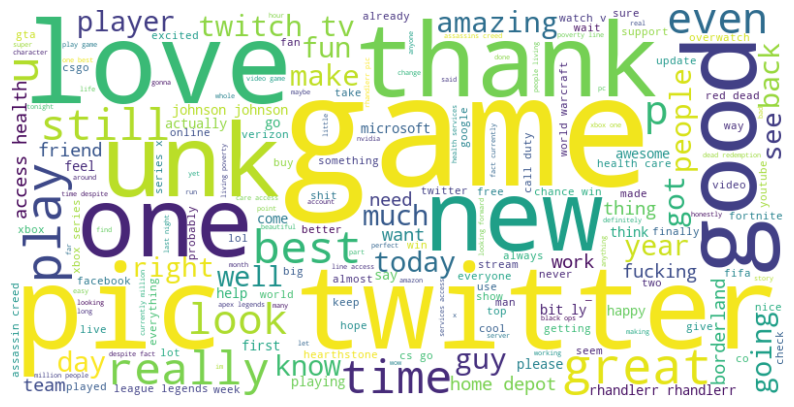

Word Cloud for Negative Sentiments


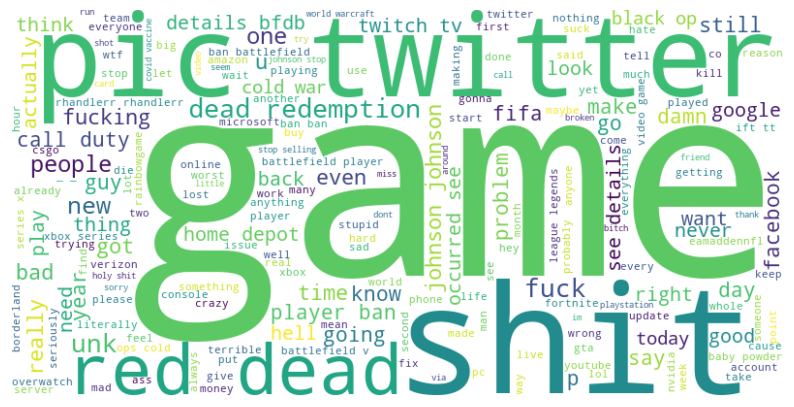

Word Cloud for Neutral Sentiments


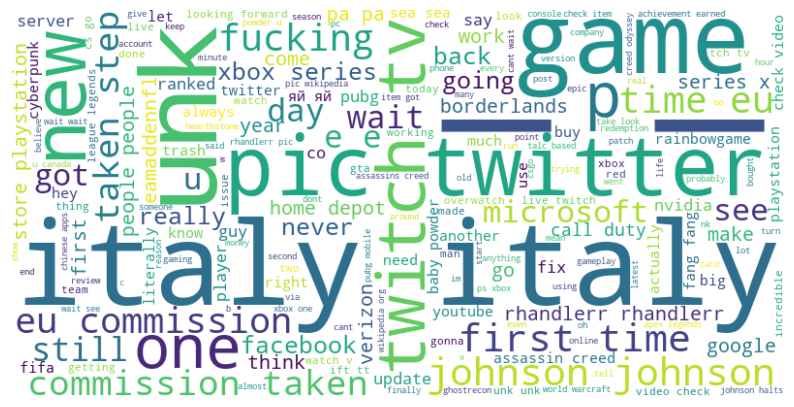

In [15]:
# Visualization: Word Cloud for Positive, Negative, and Neutral Sentiments
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment class
positive_text = ' '.join(df[df['sentiment_class'] == 'positive']['cleaned_text'])
negative_text = ' '.join(df[df['sentiment_class'] == 'negative']['cleaned_text'])
neutral_text = ' '.join(df[df['sentiment_class'] == 'neutral']['cleaned_text'])

print("Word Cloud for Positive Sentiments")
generate_wordcloud(positive_text)

print("Word Cloud for Negative Sentiments")
generate_wordcloud(negative_text)

print("Word Cloud for Neutral Sentiments")
generate_wordcloud(neutral_text)